In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

#%matplotlib notebook

Загрузим и бросим первый взгляд на данные

In [2]:
eth_path = 'md/ethusdt:Binance:LinearPerpetual/'
btc_path = 'md/btcusdt:Binance:LinearPerpetual/'
eth_lobs, eth_trades = pd.read_csv(eth_path + 'lobs.csv', skipinitialspace=True), pd.read_csv(eth_path + 'trades.csv', skipinitialspace=True)
btc_lobs, btc_trades = pd.read_csv(btc_path + 'lobs.csv', skipinitialspace=True), pd.read_csv(btc_path + 'trades.csv', skipinitialspace=True)

In [3]:
sns.set_theme()

In [4]:
btc_lobs.shape

(2541356, 42)

In [5]:
btc_trades.head()

,receive_ts,exchange_ts,aggro_side,price,size
0,1655942402624789714,1655942402623000000,BID,19977.5,0.001
1,1655942405293556247,1655942405292000000,BID,19977.5,0.041
2,1655942405293628020,1655942405292000000,BID,19977.5,0.036
3,1655942405293832021,1655942405292000000,BID,19977.5,0.001
4,1655942405293929517,1655942405292000000,BID,19977.5,0.001


In [6]:
btc_lobs.head()

,receive_ts,exchange_ts,btcusdt:Binance:LinearPerpetual_ask_price_0,btcusdt:Binance:LinearPerpetual_ask_vol_0,btcusdt:Binance:LinearPerpetual_bid_price_0,btcusdt:Binance:LinearPerpetual_bid_vol_0,btcusdt:Binance:LinearPerpetual_ask_price_1,btcusdt:Binance:LinearPerpetual_ask_vol_1,btcusdt:Binance:LinearPerpetual_bid_price_1,btcusdt:Binance:LinearPerpetual_bid_vol_1,...,btcusdt:Binance:LinearPerpetual_bid_price_7,btcusdt:Binance:LinearPerpetual_bid_vol_7,btcusdt:Binance:LinearPerpetual_ask_price_8,btcusdt:Binance:LinearPerpetual_ask_vol_8,btcusdt:Binance:LinearPerpetual_bid_price_8,btcusdt:Binance:LinearPerpetual_bid_vol_8,btcusdt:Binance:LinearPerpetual_ask_price_9,btcusdt:Binance:LinearPerpetual_ask_vol_9,btcusdt:Binance:LinearPerpetual_bid_price_9,btcusdt:Binance:LinearPerpetual_bid_vol_9
0,1655942402250125991,1655942402249000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19976.7,0.066,...,19975.7,4.455,19980.1,0.01,19975.6,1.529,19980.2,0.01,19975.4,1.641
1,1655942402657844605,1655942402655000000,19977.5,0.078,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.9,0.246,19980.1,0.01,19975.8,0.686,19980.2,0.01,19975.7,4.455
2,1655942403346968722,1655942403346000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.9,0.246,19980.1,0.01,19975.8,0.686,19980.2,0.01,19975.7,4.455
3,1655942404080791047,1655942404080000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.9,0.246,19980.1,0.01,19975.8,0.686,19980.2,0.01,19975.7,4.455
4,1655942404452706766,1655942404452000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.9,0.246,19980.1,0.01,19975.8,0.686,19980.2,0.01,19975.7,4.455


1) Построить графики, как ведут себя best уровни стаканов (файл lobs) и price проведённых сделок (файл trades) во времени. <br>

Раскомментируйте код в следующей ячейке, если хотите включить (жутко лагающий!) интерактивный режим для следующих графиков

In [7]:
#%matplotlib notebook

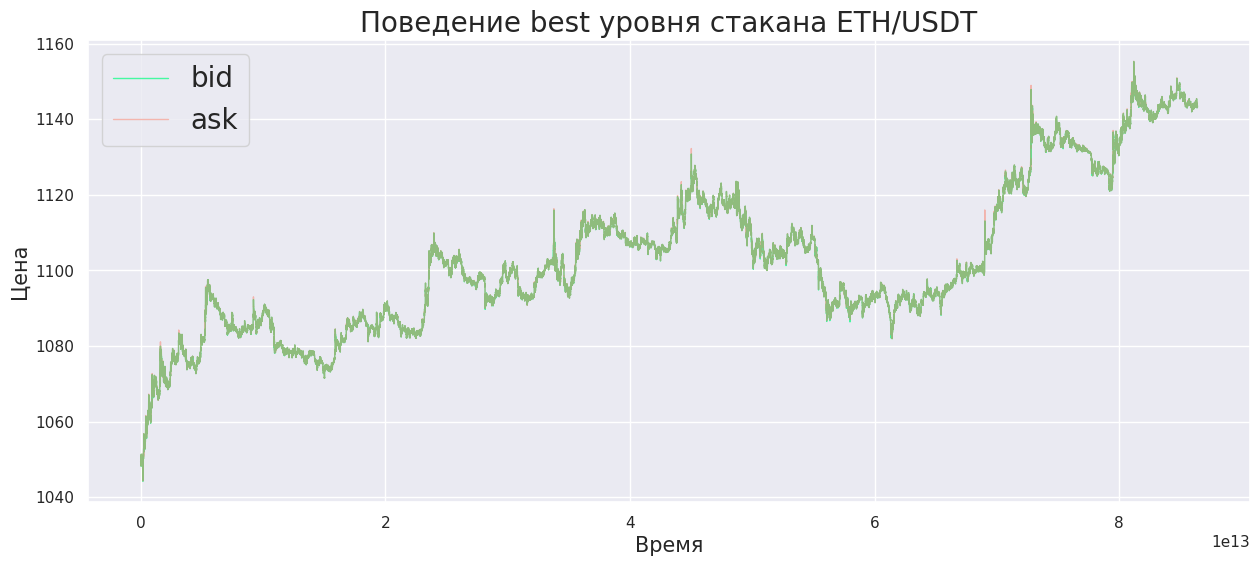

In [8]:
fig = plt.figure(figsize=(15, 6))
eth_best_level_bid = eth_lobs['ethusdt:Binance:LinearPerpetual_bid_price_0']
eth_best_level_ask = eth_lobs['ethusdt:Binance:LinearPerpetual_ask_price_0']
eth_scaled_time = eth_lobs['receive_ts'] - eth_lobs.loc[0, 'receive_ts']

plt.plot(eth_scaled_time, eth_best_level_bid, color='springgreen', alpha=0.7, label='bid', linewidth=1)
plt.plot(eth_scaled_time, eth_best_level_ask, color='tomato', alpha=0.4, label='ask', linewidth=1)
plt.title('Поведение best уровня стакана ETH/USDT', size=20)
plt.xlabel('Время', size=15)
plt.ylabel('Цена', size=15)
plt.legend(fontsize=20);

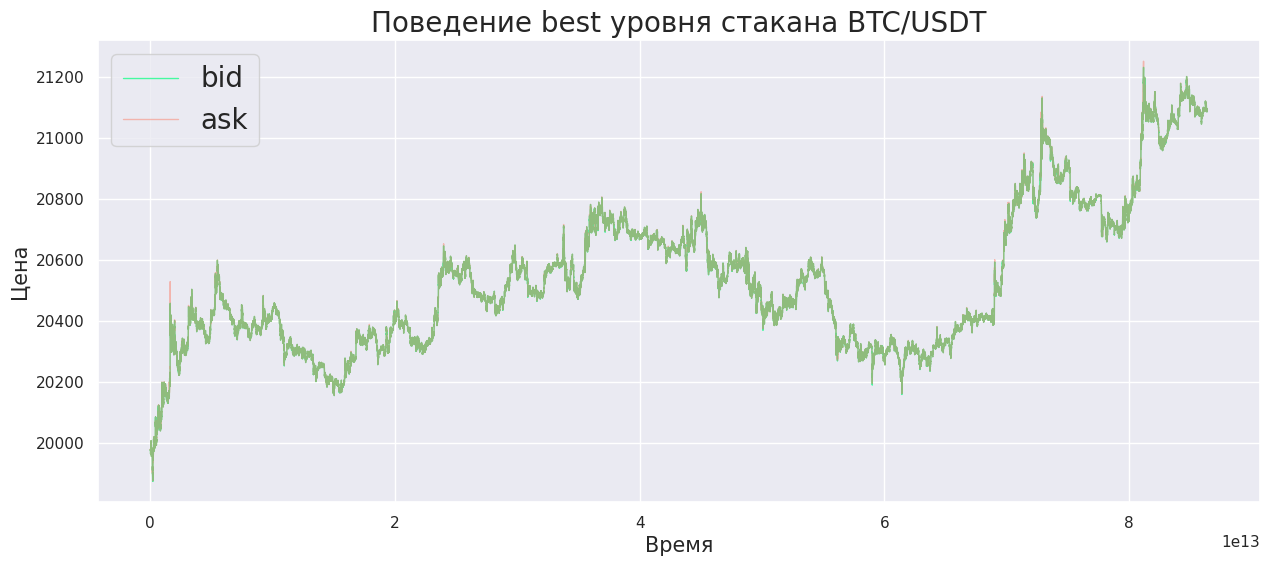

In [40]:
fig = plt.figure(figsize=(15, 6))
btc_best_level_bid = btc_lobs['btcusdt:Binance:LinearPerpetual_bid_price_0']
btc_best_level_ask = btc_lobs['btcusdt:Binance:LinearPerpetual_ask_price_0']
btc_scaled_time = btc_lobs['receive_ts'] - btc_lobs.loc[0, 'receive_ts']

plt.plot(btc_scaled_time, btc_best_level_bid, color='springgreen', alpha=0.7, label='bid', linewidth=1)
plt.plot(btc_scaled_time, btc_best_level_ask, color='tomato', alpha=0.4, label='ask', linewidth=1)
plt.title('Поведение best уровня стакана BTC/USDT', size=20)
plt.xlabel('Время', size=15)
plt.ylabel('Цена', size=15)
plt.legend(fontsize=20);

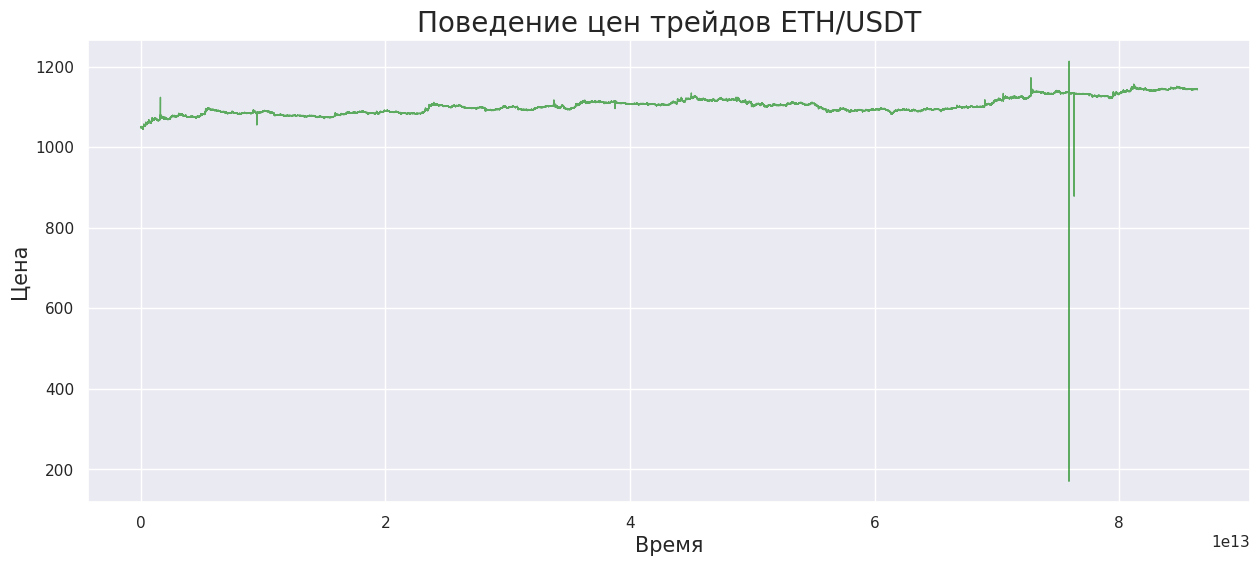

In [10]:
fig = plt.figure(figsize=(15, 6))
eth_price = eth_trades['price']
eth_scaled_time = eth_trades['receive_ts'] - eth_trades.loc[0, 'receive_ts']

plt.plot(eth_scaled_time, eth_price, color='green', alpha=0.6, linewidth=1)
plt.title('Поведение цен трейдов ETH/USDT', size=20)
plt.xlabel('Время', size=15)
plt.ylabel('Цена', size=15);

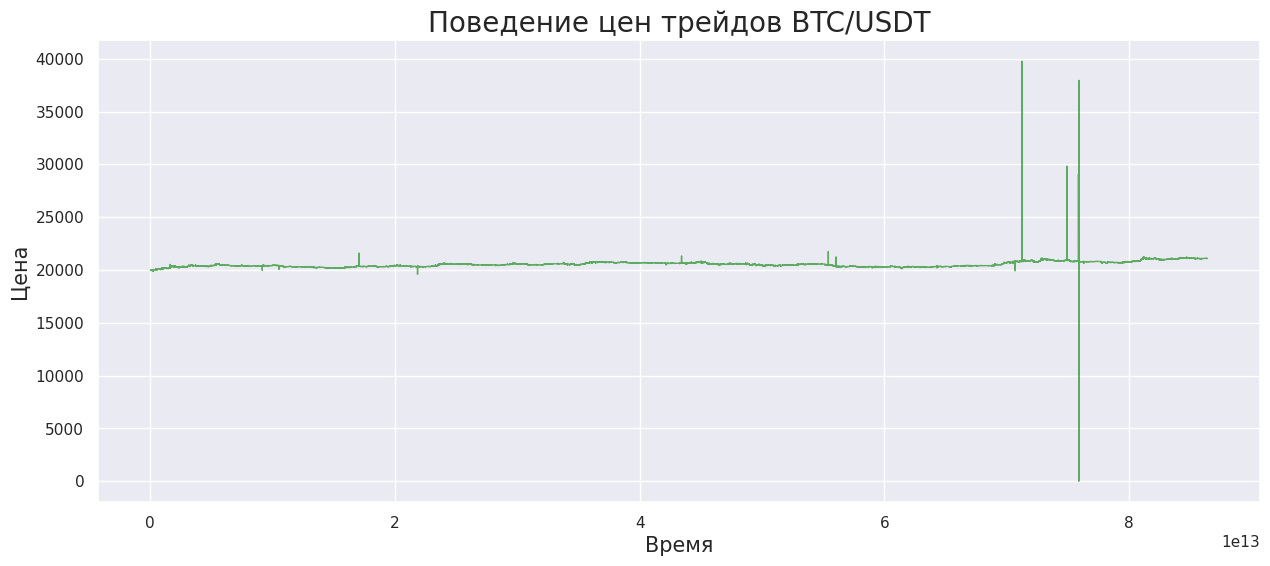

In [11]:
fig = plt.figure(figsize=(15, 6))
btc_price = btc_trades['price']
btc_scaled_time = btc_trades['receive_ts'] - btc_trades.loc[0, 'receive_ts']

plt.plot(btc_scaled_time, btc_price, color='green', alpha=0.6, linewidth=1)
plt.title('Поведение цен трейдов BTC/USDT', size=20)
plt.xlabel('Время', size=15)
plt.ylabel('Цена', size=15);

Есть аномальные просадки стоимостей коинов в 0 - попробуем посмотреть на графики без них

In [12]:
mask = (eth_trades['price'] <= eth_trades['price'].quantile(0.999)) & (eth_trades['price'] >= eth_trades['price'].quantile(0.001))

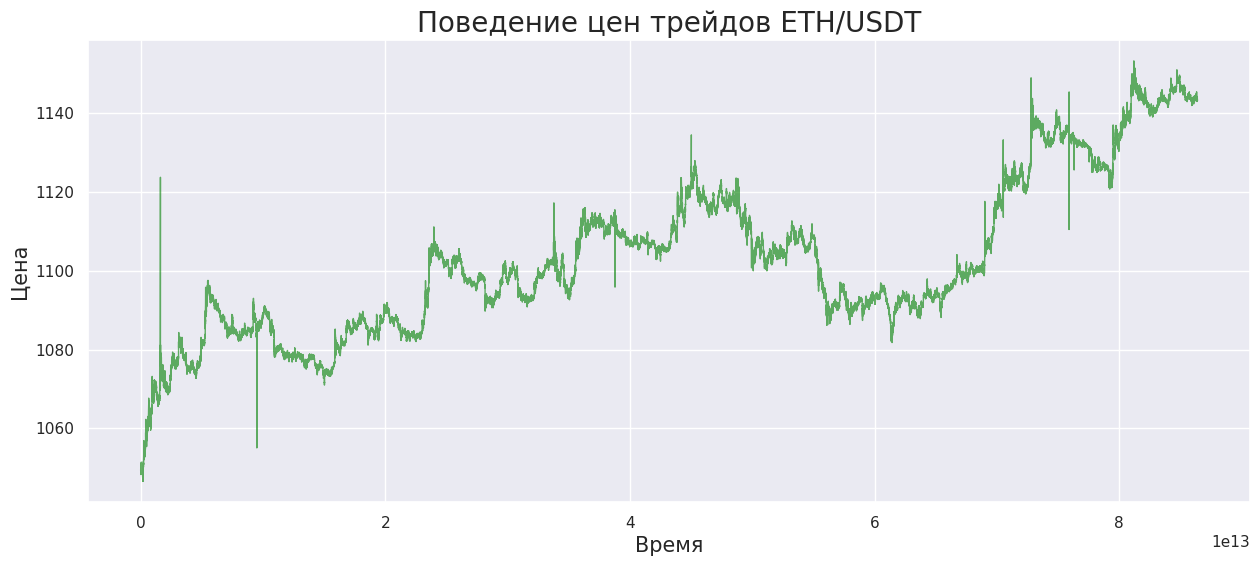

In [13]:
fig = plt.figure(figsize=(15, 6))

eth_price = eth_trades['price'][mask]
eth_scaled_time = eth_trades['receive_ts'][mask] - eth_trades.loc[0, 'receive_ts']

plt.plot(eth_scaled_time, eth_price, color='green', alpha=0.6, linewidth=1)
plt.title('Поведение цен трейдов ETH/USDT', size=20)
plt.xlabel('Время', size=15)
plt.ylabel('Цена', size=15);

In [14]:
mask = (btc_trades['price'] <= btc_trades['price'].quantile(0.999)) & (btc_trades['price'] >= btc_trades['price'].quantile(0.001))

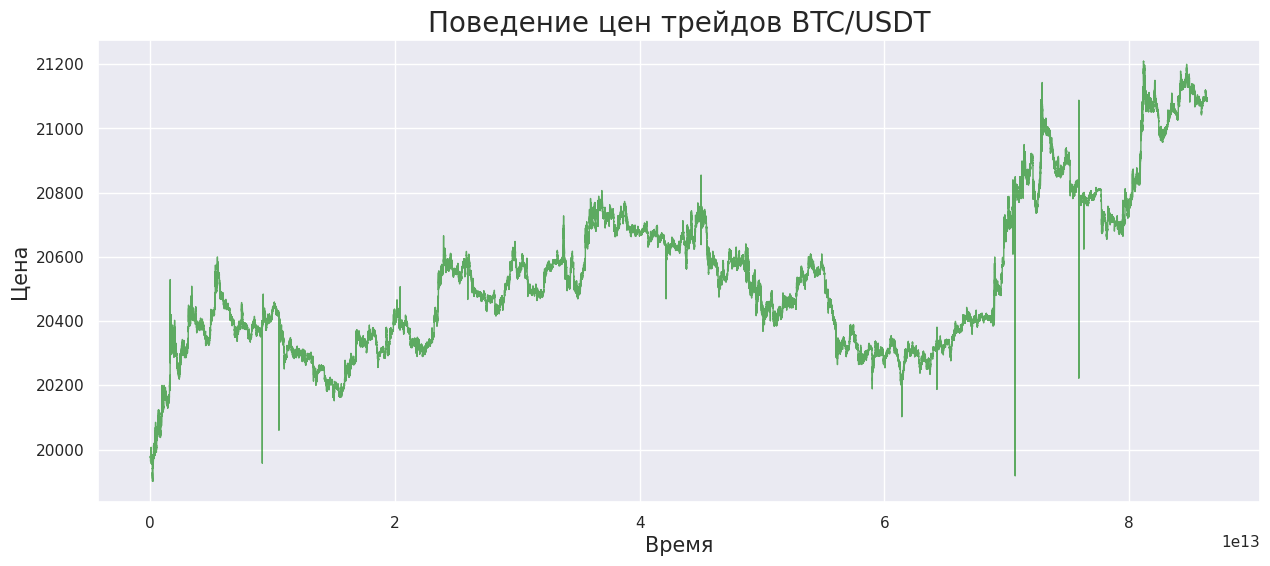

In [15]:
fig = plt.figure(figsize=(15, 6))

btc_price = btc_trades['price'][mask]
btc_scaled_time = btc_trades['receive_ts'][mask] - btc_trades.loc[0, 'receive_ts']

plt.plot(btc_scaled_time, btc_price, color='green', alpha=0.6, linewidth=1)
plt.title('Поведение цен трейдов BTC/USDT', size=20)
plt.xlabel('Время', size=15)
plt.ylabel('Цена', size=15);

В целом оба коина следуют одному и тому же тренду, однако у BTC чаще возникают кратковременные просадки в цене, которых в то же время нет у ETH. <br>
2) Посчитать статистики: 0.05 и 0.95 квантили, медиана, средняя, дисперсия для любой из указанных величин на выбор: размер трейда, объём какого-то фиксированного уровня стакана.

In [16]:
btc_little_quantile = np.quantile(btc_trades['size'], 0.05)
btc_big_quantile = np.quantile(btc_trades['size'], 0.95)
btc_median = np.median(btc_trades['size'])
btc_mean = np.mean(btc_trades['size'])
btc_var = np.var(btc_trades['size'])
print(f'Статистики размера трейда для BTC/USDT:\n',
      f'0.05 квантиль: {btc_little_quantile}\n',
      f'0.95 квантиль: {btc_big_quantile}\n',
      f'Медиана: {btc_median}\n',
      f'Среднее: {btc_mean}\n',
      f'Дисперсия: {btc_var}'
     )
eth_little_quantile = np.quantile(eth_trades['size'], 0.05)
eth_big_quantile = np.quantile(eth_trades['size'], 0.95)
eth_median = np.median(eth_trades['size'])
eth_mean = np.mean(eth_trades['size'])
eth_var = np.var(eth_trades['size'])
print(f'Статистики размера трейда для ETH/USDT:\n',
      f'0.05 квантиль: {eth_little_quantile}\n',
      f'0.95 квантиль: {eth_big_quantile}\n',
      f'Медиана: {eth_median}\n',
      f'Среднее: {eth_mean}\n',
      f'Дисперсия: {eth_var}'
     )

Статистики размера трейда для BTC/USDT:
 0.05 квантиль: 0.001
 0.95 квантиль: 0.519
 Медиана: 0.017
 Среднее: 0.12200803165201911
 Дисперсия: 0.3132316967390358
Статистики размера трейда для ETH/USDT:
 0.05 квантиль: 0.005
 0.95 квантиль: 5.0
 Медиана: 0.153
 Среднее: 1.2198729337024956
 Дисперсия: 40.117392078743485


Некоторое описание характеристики трейдов мы получили, посмотрим же теперь на объёмы торгов

In [17]:
btc_scaled_time = btc_trades['receive_ts'] - btc_trades.loc[0, 'receive_ts']
eth_scaled_time = eth_trades['receive_ts'] - eth_trades.loc[0, 'receive_ts']

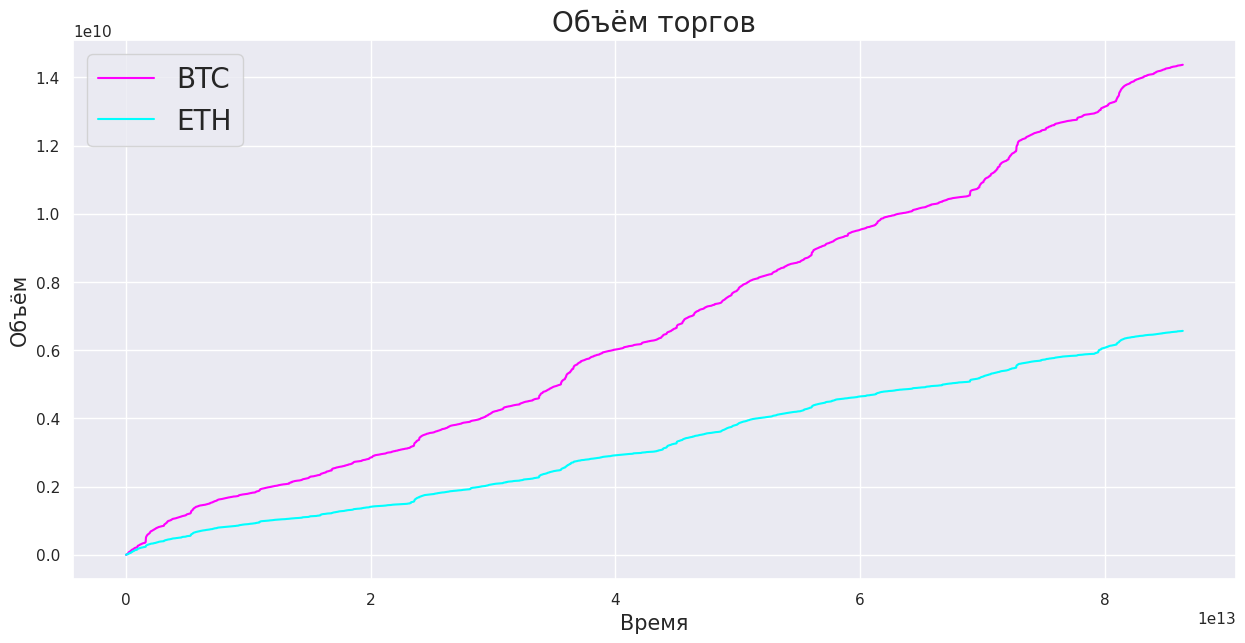

In [18]:
btc_vol = (btc_trades['size'] * btc_trades['price']).cumsum()
eth_vol = (eth_trades['size'] * eth_trades['price']).cumsum()

plt.figure(figsize=(15, 7))

plt.plot(btc_scaled_time, btc_vol, color='magenta', label='BTC')
plt.plot(eth_scaled_time, eth_vol, color='aqua', label='ETH')
plt.title('Объём торгов', fontsize=20)
plt.xlabel('Время', fontsize=15)
plt.ylabel('Объём', fontsize=15)
plt.legend(fontsize=20);

Объём торгов и скорость наращивания у BTC больше, любой небольшой скачок в росте у ETH означает чуть больший скачок через малый промежуток времения для BTC. Однако интересное имеется расхождение начиная с момента времени 7 - там объём торгов BTC резко возрастает, при этом у ETH скорость роста практически не изменилась.

3) Построить гистограммы распределений а) для трейдов  и б) объёмов первых 5 уровней стканов. Строить нужно отдельно для каждой стороны стакана (bid/ask), объём на k-ом уровне считать кумулятивно (сумма первых k-уровней).

In [19]:
#eth_trades['receive_ts'] -= eth_trades.loc[0, 'receive_ts']
#btc_trades['receive_ts'] -= btc_trades.loc[0, 'receive_ts']

In [20]:
eth_bid_trade = eth_trades[eth_trades['aggro_side'] == 'BID']
eth_ask_trade = eth_trades[eth_trades['aggro_side'] == 'ASK']

btc_bid_trade = btc_trades[btc_trades['aggro_side'] == 'BID']
btc_ask_trade = btc_trades[btc_trades['aggro_side'] == 'ASK']

In [21]:
#eth_bid_trade['receive_ts'] = (eth_bid_trade['receive_ts'] - eth_bid_trade['receive_ts'].min()) / (eth_bid_trade['receive_ts'].max() - eth_bid_trade['receive_ts'].min())

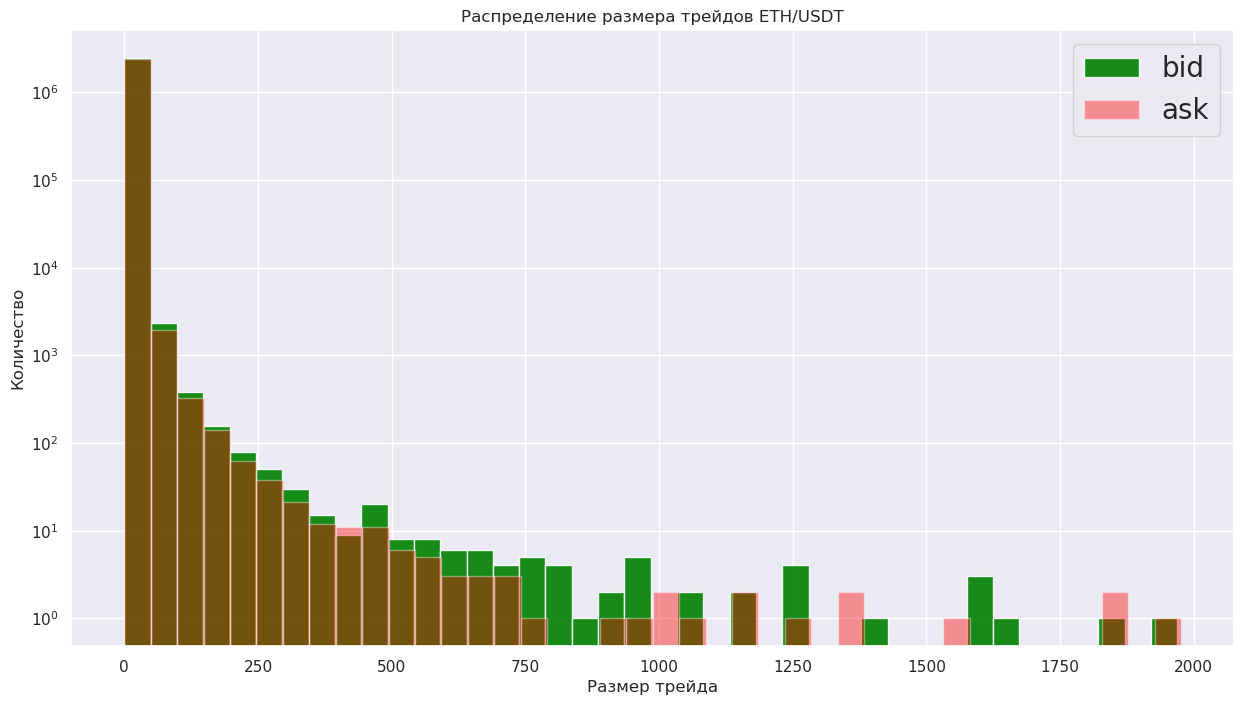

In [22]:
fig = plt.figure(figsize=(15, 8))

plt.hist(eth_bid_trade['size'], bins=40, color='green', label='bid', alpha=0.9)
plt.hist(eth_ask_trade['size'], bins=40, color='red', label='ask', alpha=0.4)
plt.yscale('log')
plt.xlabel('Размер трейда')
plt.ylabel('Количество')
plt.title('Распределение размера трейдов ETH/USDT')
plt.legend(fontsize=20);

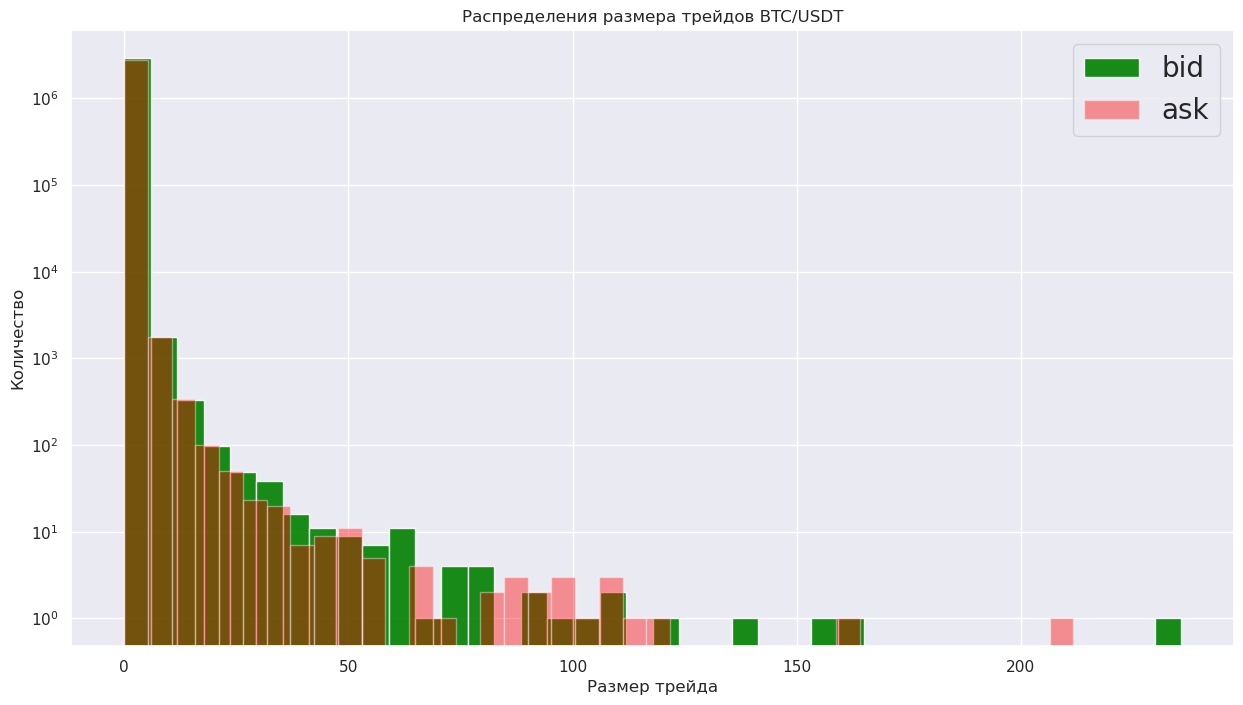

In [23]:
fig = plt.figure(figsize=(15, 8))

plt.hist(btc_bid_trade['size'], bins=40, color='green', label='bid', alpha=0.9)
plt.hist(btc_ask_trade['size'], bins=40, color='red', label='ask', alpha=0.4)
plt.yscale('log')
plt.xlabel('Размер трейда')
plt.ylabel('Количество')
plt.title('Распределения размера трейдов BTC/USDT')
plt.legend(fontsize=20);

По гистограммам видно, что основной объём торгов сконцентрирован на небольших размерах трейда и снижается экспоненциально - достаточно интуитивно.

In [24]:
eth_lobs.head()

,receive_ts,exchange_ts,ethusdt:Binance:LinearPerpetual_ask_price_0,ethusdt:Binance:LinearPerpetual_ask_vol_0,ethusdt:Binance:LinearPerpetual_bid_price_0,ethusdt:Binance:LinearPerpetual_bid_vol_0,ethusdt:Binance:LinearPerpetual_ask_price_1,ethusdt:Binance:LinearPerpetual_ask_vol_1,ethusdt:Binance:LinearPerpetual_bid_price_1,ethusdt:Binance:LinearPerpetual_bid_vol_1,...,ethusdt:Binance:LinearPerpetual_bid_price_7,ethusdt:Binance:LinearPerpetual_bid_vol_7,ethusdt:Binance:LinearPerpetual_ask_price_8,ethusdt:Binance:LinearPerpetual_ask_vol_8,ethusdt:Binance:LinearPerpetual_bid_price_8,ethusdt:Binance:LinearPerpetual_bid_vol_8,ethusdt:Binance:LinearPerpetual_ask_price_9,ethusdt:Binance:LinearPerpetual_ask_vol_9,ethusdt:Binance:LinearPerpetual_bid_price_9,ethusdt:Binance:LinearPerpetual_bid_vol_9
0,1655942402250395360,1655942402249000000,1049.45,1.046,1049.44,0.782,1049.46,2.229,1049.43,5.0,...,1049.31,7.495,1049.53,2.229,1049.3,1.452,1049.54,27.741,1049.29,2.387
1,1655942402656012600,1655942402655000000,1049.45,0.314,1049.44,19.860,1049.46,2.243,1049.43,5.0,...,1049.31,7.495,1049.53,2.229,1049.3,1.452,1049.54,27.741,1049.29,2.387
2,1655942403348658915,1655942403348000000,1049.45,0.314,1049.44,19.860,1049.46,2.243,1049.43,5.0,...,1049.31,7.495,1049.53,2.229,1049.3,1.452,1049.54,27.741,1049.29,2.387
3,1655942404080743828,1655942404080000000,1049.45,0.314,1049.44,19.860,1049.46,2.243,1049.43,5.0,...,1049.31,7.495,1049.53,2.229,1049.3,1.452,1049.54,27.741,1049.29,2.387
4,1655942404151722232,1655942404151000000,1049.45,0.314,1049.44,19.860,1049.46,2.243,1049.43,5.0,...,1049.31,7.495,1049.53,2.229,1049.3,1.452,1049.54,27.741,1049.29,2.387


In [25]:
eth_bid_vol = eth_lobs.loc[:, [col for col in eth_lobs.columns if 'bid_vol' in col][:-5]].cumsum(axis=1)
eth_ask_vol = eth_lobs.loc[:, [col for col in eth_lobs.columns if 'ask_vol' in col][:-5]].cumsum(axis=1)
btc_bid_vol = btc_lobs.loc[:, [col for col in btc_lobs.columns if 'bid_vol' in col][:-5]].cumsum(axis=1)
btc_ask_vol = btc_lobs.loc[:, [col for col in btc_lobs.columns if 'ask_vol' in col][:-5]].cumsum(axis=1)

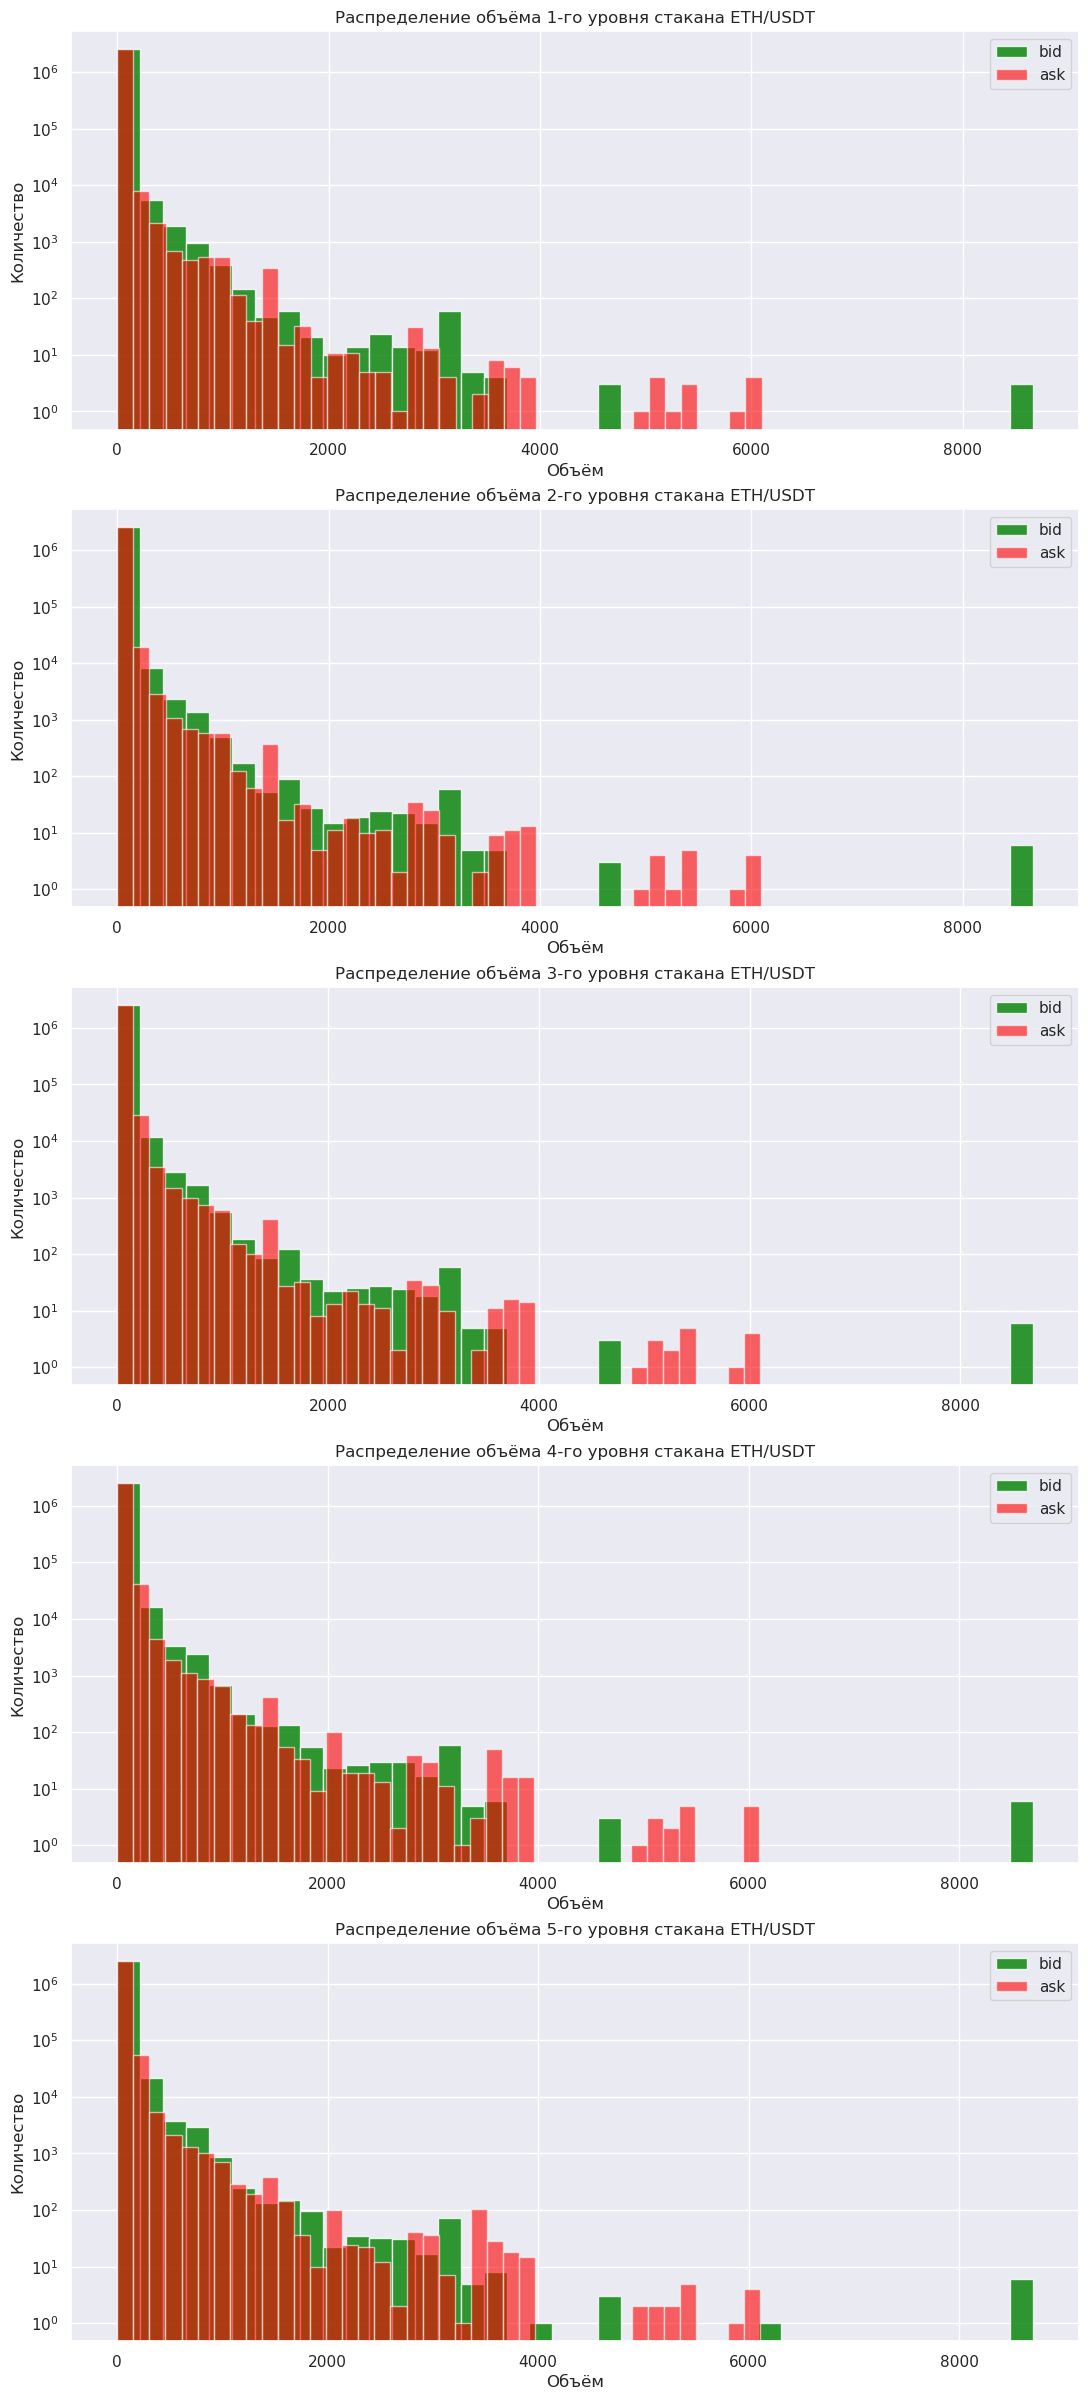

In [26]:
fig, axs = plt.subplots(ncols=1, nrows=5, figsize=(13, 30))

for i in range(5):
    axs[i].hist(eth_bid_vol.iloc[:, i], bins=40, color='green', label='bid', alpha=0.8)
    axs[i].hist(eth_ask_vol.iloc[:, i], bins=40, color='red', label='ask', alpha=0.6)
    axs[i].set_title(f'Распределение объёма {i+1}-го уровня стакана ETH/USDT')
    axs[i].set_xlabel('Объём')
    axs[i].set_ylabel('Количество')
    axs[i].set_yscale('log')
    axs[i].legend();

In [27]:
btc_bid_vol[btc_bid_vol.columns[0]].describe()

count    2.541356e+06
mean     2.682905e+00
std      5.588091e+00
min      1.000000e-03
25%      3.400000e-01
50%      1.377000e+00
75%      3.525000e+00
max      9.059300e+02
Name: btcusdt:Binance:LinearPerpetual_bid_vol_0, dtype: float64

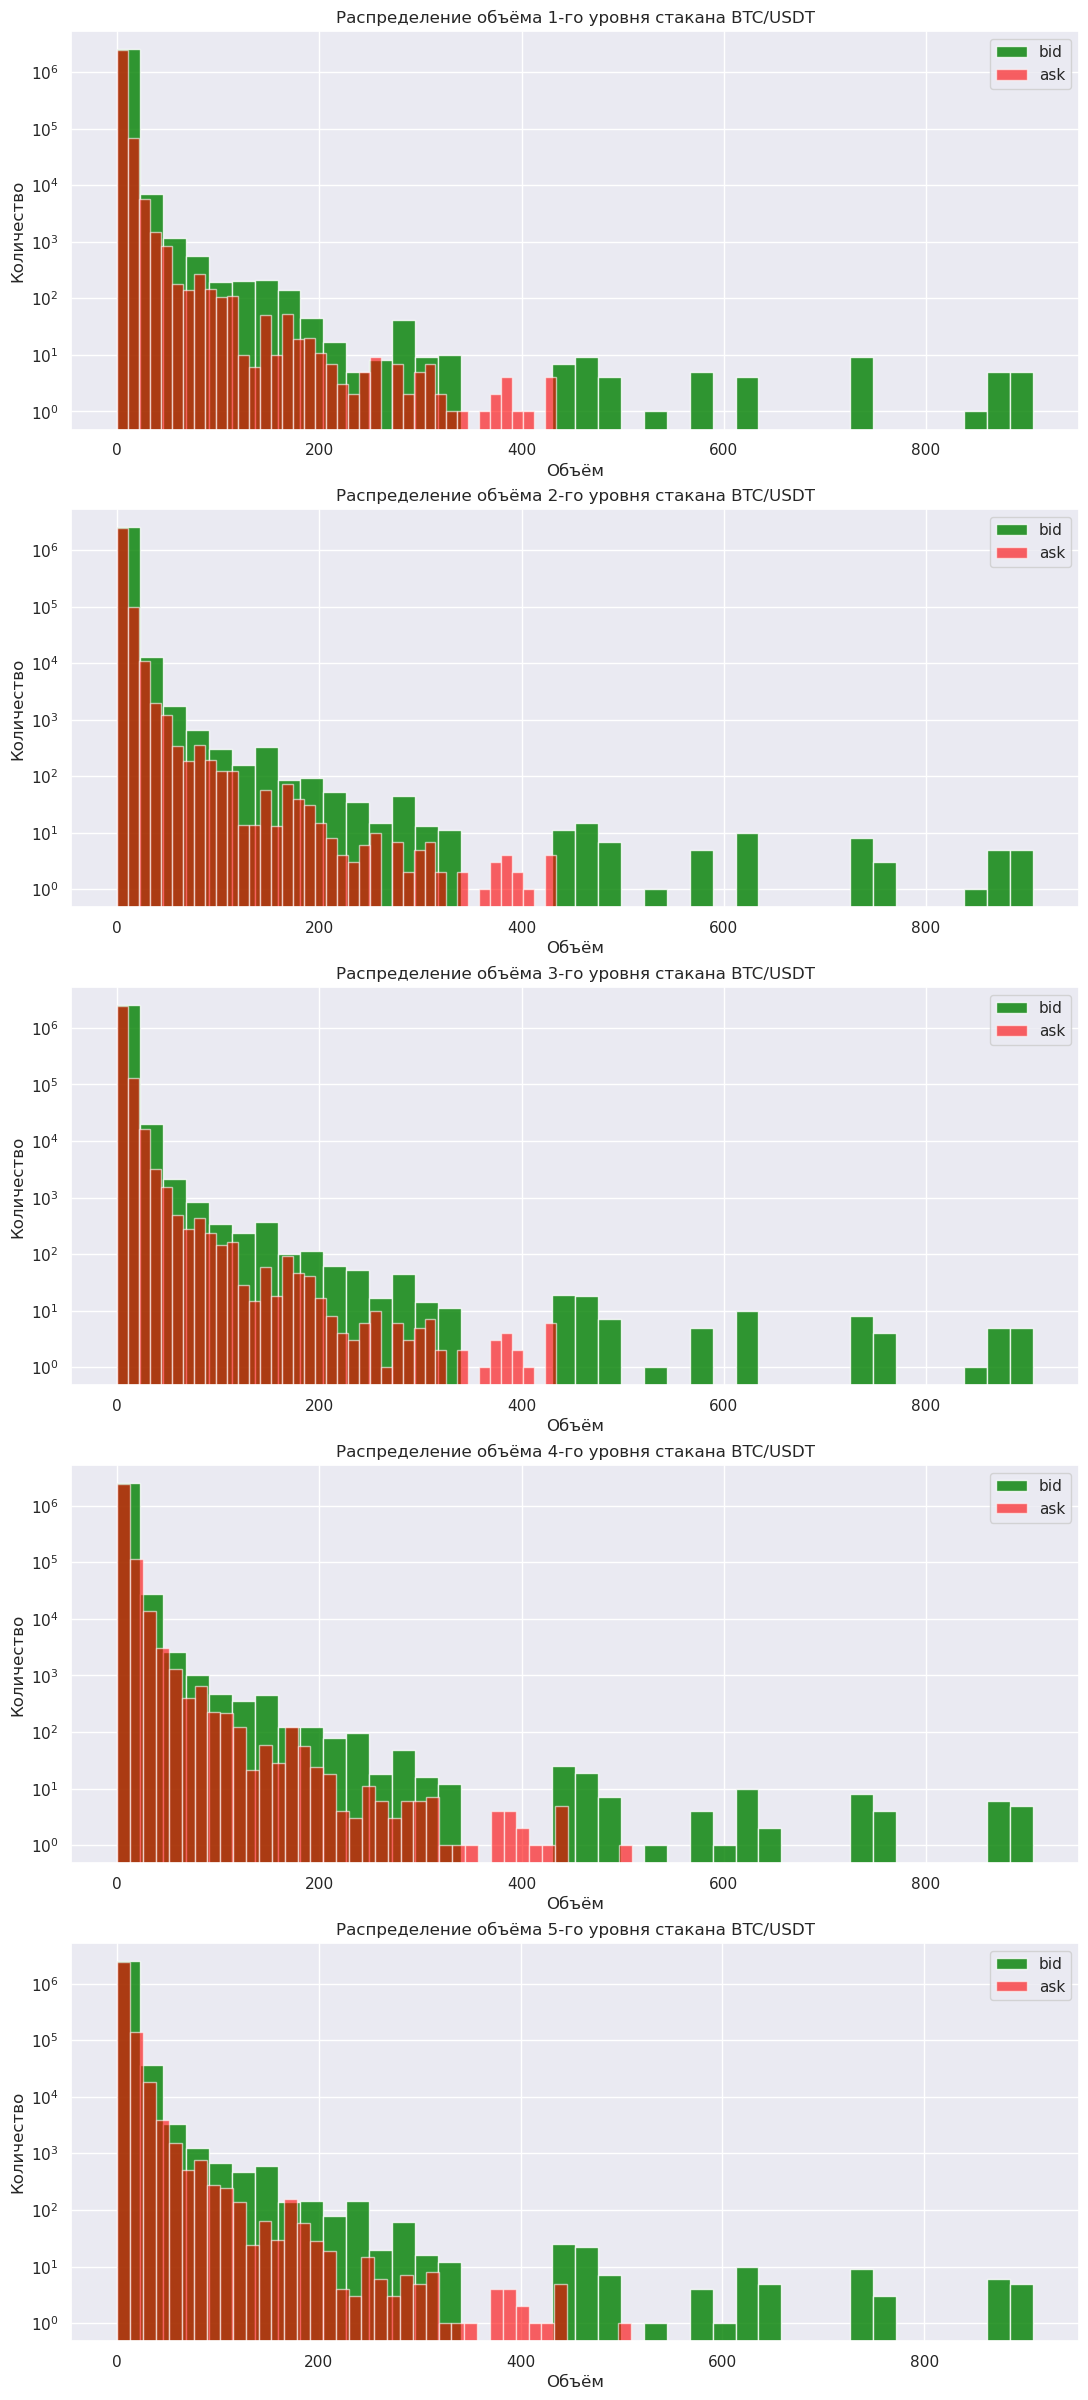

In [28]:
fig, axs = plt.subplots(ncols=1, nrows=5, figsize=(13, 30))

for i in range(5):
    axs[i].hist(btc_bid_vol.iloc[:, i], bins=40, color='green', label='bid', alpha=0.8)
    axs[i].hist(btc_ask_vol.iloc[:, i], bins=40, color='red', label='ask', alpha=0.6)
    axs[i].set_title(f'Распределение объёма {i+1}-го уровня стакана BTC/USDT')
    axs[i].set_xlabel('Объём')
    axs[i].set_ylabel('Количество')
    axs[i].set_yscale('log')
    axs[i].legend();

Основная масса всё также сконцентрирована в небольшом объёме и экспоненциально убывает, причём bid ордеров всегда больше, особенно на больших объёмах - вероятно это можно объяснить тем, что это лимит ордеры на стоимость сильно ниже рыночной и поэтому их так мало и они "долго" висят

4) Также нужно построить график величины "пробития" стакана от размера трейда того, насколько "пробивается" стакан в результате трейда. Величиной пробития стакана называется величина измения best_price в результате трейда. Считать также стоит раздельно для каждой стороны. <br>
Смёрджим данные о стакане и трейдах по "exchange_ts" и проделаем некоторые преобразования над данными. Попробуем исследовать пробитие стакана следующим образом: когда исполнился трейд, найдём следующий такт времени и посмотрим, изменилась ли best_price - если да, то мы пробили стакан.

In [29]:
eth_bid_trade = eth_trades[eth_trades['aggro_side'] == 'BID']
eth_ask_trade = eth_trades[eth_trades['aggro_side'] == 'ASK']

btc_bid_trade = btc_trades[btc_trades['aggro_side'] == 'BID']
btc_ask_trade = btc_trades[btc_trades['aggro_side'] == 'ASK']

In [30]:
eth_bid_lobs = eth_lobs.loc[:, [col for col in eth_lobs.columns if 'bid_price_0' in col] + ['exchange_ts']]
eth_ask_lobs = eth_lobs.loc[:, [col for col in eth_lobs.columns if 'ask_price_0' in col] + ['exchange_ts']]
btc_bid_lobs = btc_lobs.loc[:, [col for col in btc_lobs.columns if 'bid_price_0' in col] + ['exchange_ts']]
btc_ask_lobs = btc_lobs.loc[:, [col for col in btc_lobs.columns if 'ask_price_0' in col] + ['exchange_ts']]

In [31]:
eth_bid_merged = eth_bid_lobs.merge(eth_bid_trade, how='inner', on='exchange_ts')
eth_ask_merged = eth_ask_lobs.merge(eth_ask_trade, how='inner', on='exchange_ts')
btc_bid_merged = btc_bid_lobs.merge(btc_bid_trade, how='inner', on='exchange_ts')
btc_ask_merged = btc_ask_lobs.merge(btc_ask_trade, how='inner', on='exchange_ts')
eth_bid_merged.head()

,ethusdt:Binance:LinearPerpetual_bid_price_0,exchange_ts,receive_ts,aggro_side,price,size
0,1048.87,1655942409299000000,1655942409307336831,BID,1049.00,0.012
1,1049.44,1655942409383000000,1655942409390056387,BID,1049.45,0.148
2,1049.44,1655942409432000000,1655942409434216706,BID,1049.48,0.100
3,1049.44,1655942409485000000,1655942409486984208,BID,1049.45,0.030
4,1049.44,1655942409485000000,1655942409487181750,BID,1049.45,0.018


In [32]:
eth_ask_gr = eth_ask_merged.groupby(by='exchange_ts').agg({'ethusdt:Binance:LinearPerpetual_ask_price_0': 'max', 'price': 'min', 'size' : 'sum'}).reset_index()
eth_bid_gr = eth_bid_merged.groupby(by='exchange_ts').agg({'ethusdt:Binance:LinearPerpetual_bid_price_0': 'min', 'price': 'max', 'size' : 'sum'}).reset_index()
btc_ask_gr = btc_ask_merged.groupby(by='exchange_ts').agg({'btcusdt:Binance:LinearPerpetual_ask_price_0': 'max', 'price': 'min', 'size' : 'sum'}).reset_index()
btc_bid_gr = btc_bid_merged.groupby(by='exchange_ts').agg({'btcusdt:Binance:LinearPerpetual_bid_price_0': 'min', 'price': 'max', 'size' : 'sum'}).reset_index()

In [33]:
def find_next_ts_best_price(ts, order=eth_ask_gr):
    if order[order['exchange_ts'] > ts].shape[0] == 0:
        return order[order['exchange_ts'] == ts].iloc[0][1]
    return order[order['exchange_ts'] > ts].iloc[0][1]

Найдём для каждого трейда и соответствующего состояния стакана следующий best_price

In [34]:
new_best_price_eth_ask = []
for ts in eth_ask_gr['exchange_ts']:
    new_best_price_eth_ask.append(find_next_ts_best_price(ts, eth_ask_gr))
new_best_price_eth_ask = np.array(new_best_price_eth_ask)

new_best_price_eth_bid = []
for ts in eth_bid_gr['exchange_ts']:
    new_best_price_eth_bid.append(find_next_ts_best_price(ts, eth_bid_gr))
new_best_price_eth_bid = np.array(new_best_price_eth_bid)

new_best_price_btc_ask = []
for ts in btc_ask_gr['exchange_ts']:
    new_best_price_btc_ask.append(find_next_ts_best_price(ts, btc_ask_gr))
new_best_price_btc_ask = np.array(new_best_price_btc_ask)

new_best_price_btc_bid = []
for ts in btc_bid_gr['exchange_ts']:
    new_best_price_btc_bid.append(find_next_ts_best_price(ts, btc_bid_gr))
new_best_price_btc_bid = np.array(new_best_price_btc_bid)

In [35]:
eth_ask_gr['delta'] = -eth_ask_gr['ethusdt:Binance:LinearPerpetual_ask_price_0'] + new_best_price_eth_ask
eth_bid_gr['delta'] = -eth_bid_gr['ethusdt:Binance:LinearPerpetual_bid_price_0'] + new_best_price_eth_bid
btc_ask_gr['delta'] = -btc_ask_gr['btcusdt:Binance:LinearPerpetual_ask_price_0'] + new_best_price_btc_ask
btc_bid_gr['delta'] = -btc_bid_gr['btcusdt:Binance:LinearPerpetual_bid_price_0'] + new_best_price_btc_bid

In [36]:
eth_ask_gr['delta'].describe()

count    26879.000000
mean         0.003495
std          0.381449
min         -3.610000
25%         -0.170000
50%         -0.020000
75%          0.130000
max          4.800000
Name: delta, dtype: float64

Может возникнуть следующая ситуация: мы рассматриваем конкретный трейд, перед этим кто-то закинул большой маркет ордер на покупку (или много маленьких) и в следующий момент времени стакан пробивается не только за счёт рассматриваемого трейда, но и за счёт всё ещё исполняемого ордера. Такое можно попробовать хэндлить с помощью скользящего окна - но я, если честно, не представляю как это быстро нормально запрогать.. <br>

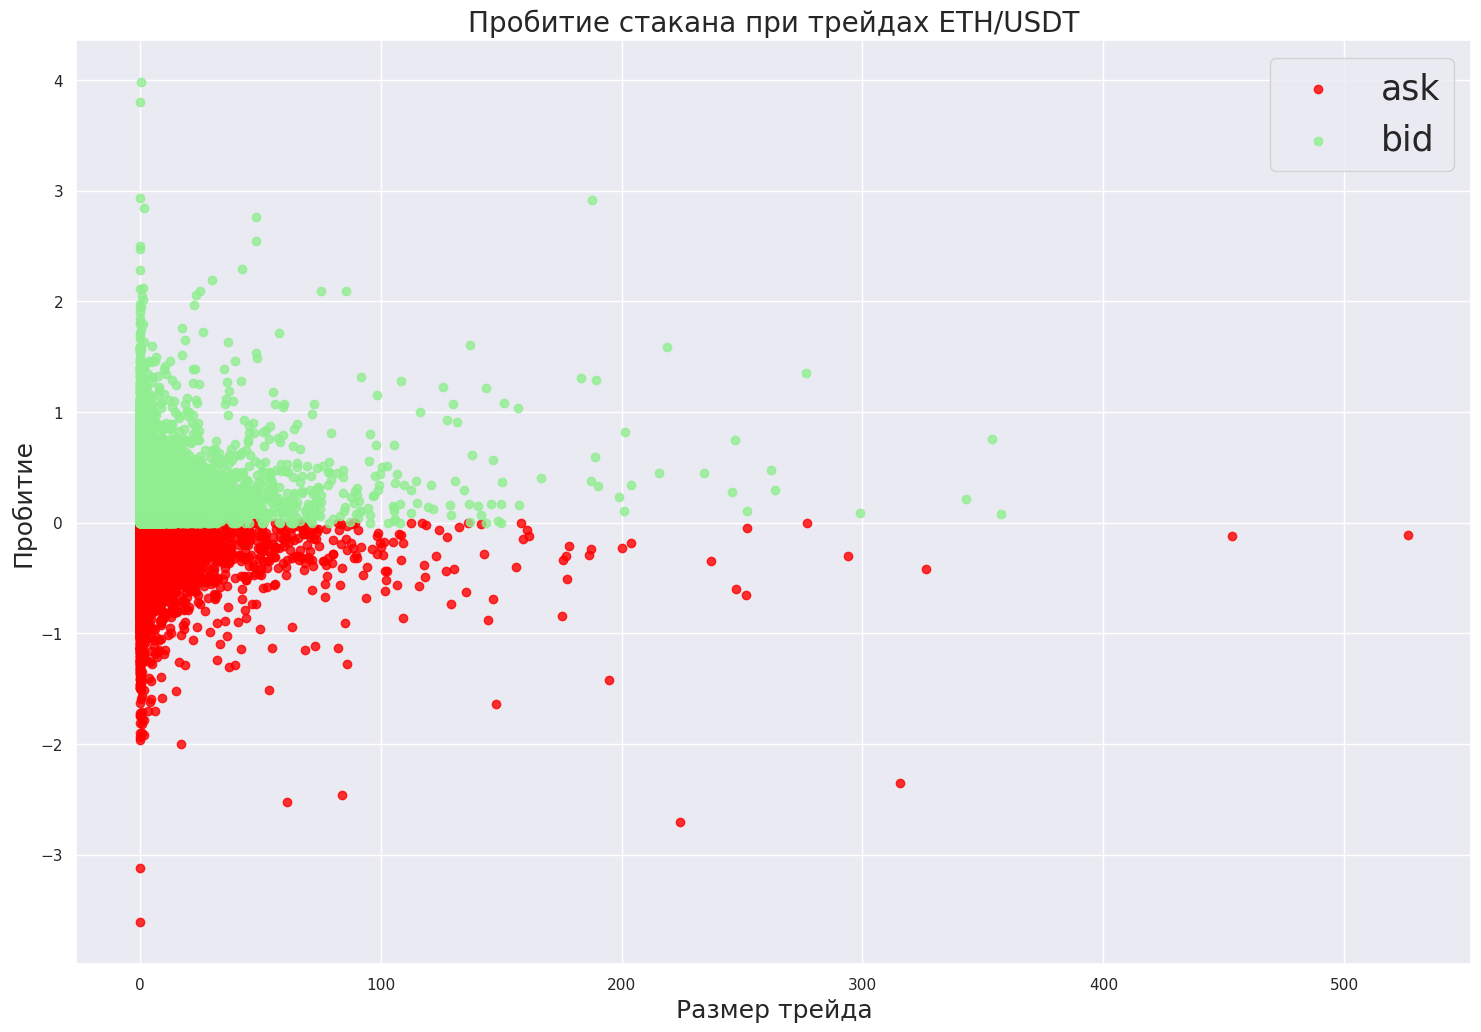

In [37]:
plt.figure(figsize=(18, 12))

plt.scatter(eth_ask_gr[eth_ask_gr['delta'] <= 0]['size'], eth_ask_gr[eth_ask_gr['delta'] <= 0]['delta'], c='red', alpha=0.8, label='ask')
plt.scatter(eth_bid_gr[eth_bid_gr['delta'] >= 0]['size'], eth_bid_gr[eth_bid_gr['delta'] >= 0]['delta'], c='lightgreen', alpha=0.8, label='bid')


plt.xlabel('Размер трейда', fontsize=18)
plt.ylabel('Пробитие', fontsize=18)
plt.title('Пробитие стакана при трейдах ETH/USDT', fontsize=20)
plt.legend(fontsize=25);

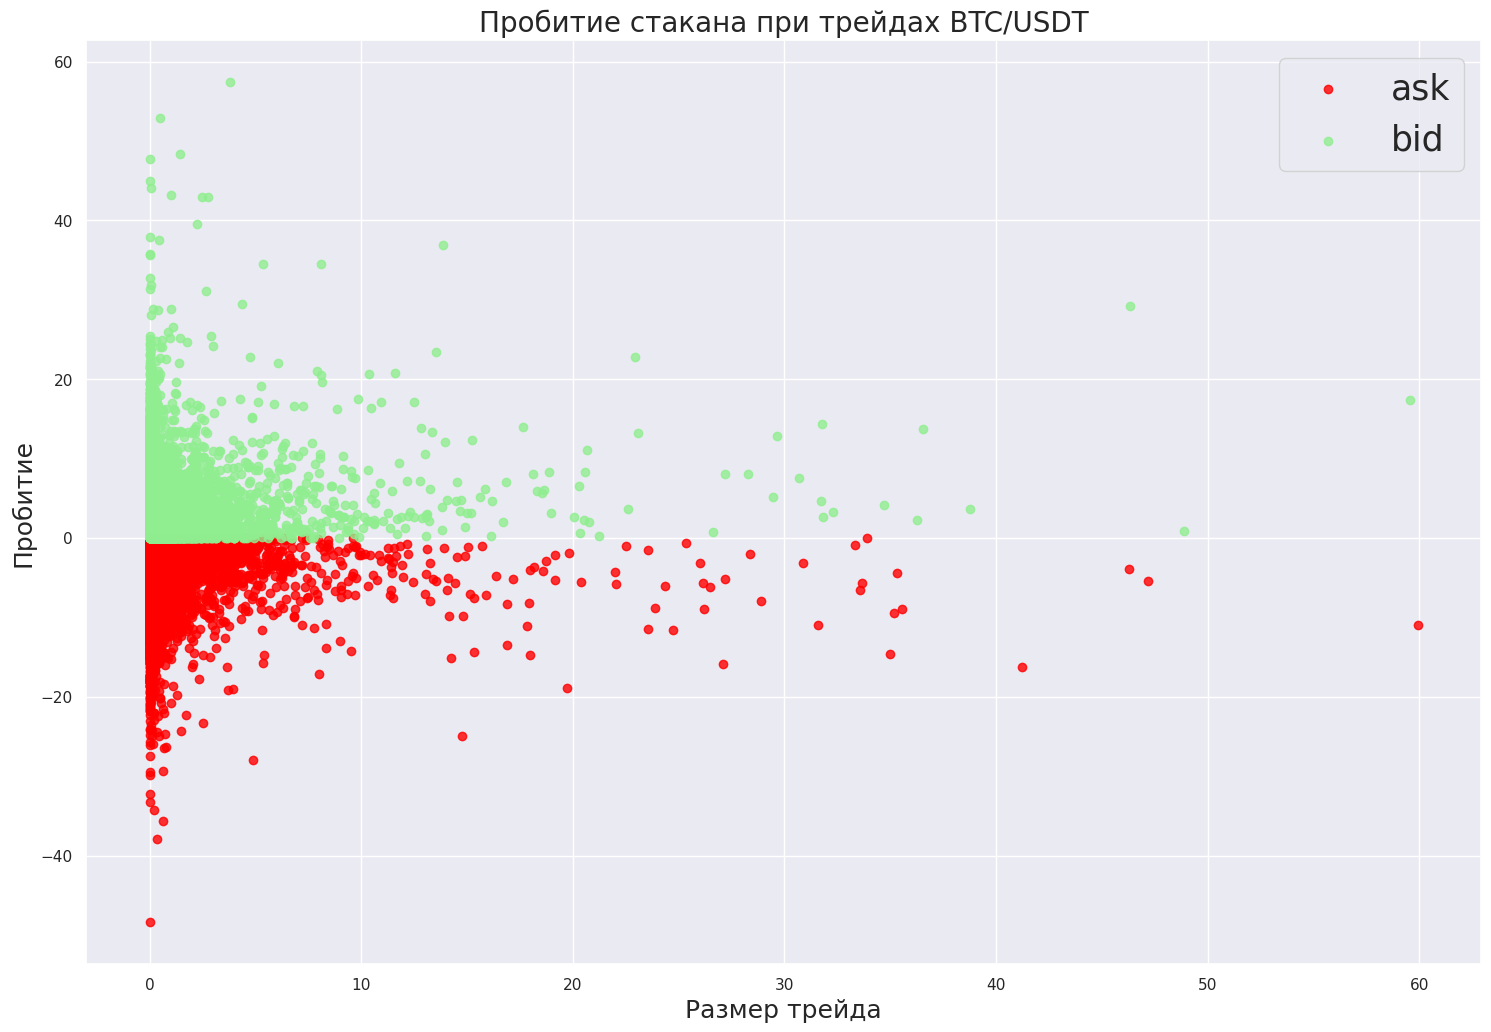

In [38]:
plt.figure(figsize=(18, 12))

plt.scatter(btc_ask_gr[btc_ask_gr['delta'] <= 0]['size'], btc_ask_gr[btc_ask_gr['delta'] <= 0]['delta'], c='red', alpha=0.8, label='ask')
plt.scatter(btc_bid_gr[btc_bid_gr['delta'] >= 0]['size'], btc_bid_gr[btc_bid_gr['delta'] >= 0]['delta'], c='lightgreen', alpha=0.8, label='bid')

plt.xlabel('Размер трейда', fontsize=18)
plt.ylabel('Пробитие', fontsize=18)
plt.title('Пробитие стакана при трейдах BTC/USDT', fontsize=20)
plt.legend(fontsize=25);

Большое пробивание стакана при маленьких размерах трейдов как раз объясняется описанной перед этим ситуацией. В целом можно заметить, что при больших размерах трейда стакан пробивается практически всегда - что довольно логично. <br> Особой разницы в зависимости для ETH и BTC нет.

Глобально картина для ETH и BTC достаточно схожа. Различия между ними в основном проявляются как следствие разницы в стоимости и объёме торгов и были отмечены в предыдущих задачах. (я пытался, честно!)